### Семинар 5: проверка статистических гипотез

Загрузим таблицу с оценками студентов по разным курсам из csv-файла по ссылке (ФИО студентов зашифрованы):

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("http://math-info.hse.ru/f/2017-18/py-prog/scores2.csv")

Посмотрим на нее:

In [ ]:
df

Удалим строки с пропущенными значениями:

In [3]:
df = df.dropna()

Выведем общую информацию по датафрейму:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 57
Data columns (total 18 columns):
id        54 non-null object
catps     54 non-null int64
mstat     54 non-null int64
soc       54 non-null int64
econ      54 non-null int64
eng       54 non-null int64
polth     54 non-null int64
mstat2    54 non-null int64
phist     54 non-null float64
law       54 non-null int64
phil      54 non-null int64
polsoc    54 non-null int64
ptheo     54 non-null float64
preg      54 non-null int64
compp     54 non-null float64
game      54 non-null int64
wpol      54 non-null int64
male      54 non-null int64
dtypes: float64(3), int64(14), object(1)
memory usage: 8.0+ KB


Выведем описательные статистики по всем количественным показателям в датафрейме:

In [5]:
df.describe()

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol,male
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.814815,7.592593,7.240741,6.259259,8.388889,6.722222,7.148148,5.833333,6.962963,6.074074,7.370370,5.685185,6.814815,5.648148,6.370370,7.722222,0.425926
std,1.388281,1.498660,1.114826,1.717668,0.959887,1.630102,1.686880,1.610695,1.164943,1.861749,1.431404,1.411864,1.332809,1.389413,1.804568,1.351682,0.499126
min,5.000000,5.000000,5.000000,4.000000,6.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
25%,6.000000,6.250000,6.000000,5.000000,8.000000,6.000000,6.000000,4.000000,6.000000,5.000000,6.000000,5.000000,6.000000,5.000000,5.000000,7.000000,0.000000
50%,7.000000,7.500000,7.000000,6.000000,8.500000,6.000000,7.000000,6.000000,7.000000,6.000000,8.000000,5.000000,7.000000,5.000000,6.000000,8.000000,0.000000
75%,7.750000,9.000000,8.000000,7.000000,9.000000,8.000000,8.750000,7.000000,8.000000,7.000000,8.000000,6.750000,8.000000,6.750000,8.000000,9.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,10.000000,10.000000,9.000000,8.000000,8.000000,10.000000,10.000000,1.000000


Попроверяем гипотезы на основе имеющихся данных – воспользуемся библиотекой `scipy`.

In [6]:
from scipy import stats

**Гипотеза о равенстве среднего числу** 

Проверим гипотезу о равенстве средней оценки студентов по экономике 6 на 5%-ном уровне значимости.

$H_0: \mu_{econ} = 6$. 

Альтернатива в Python всегда двусторонняя (по умолчанию), то есть:

$H_1: \mu_{econ} \ne 6$.

Давайте исходить из предположения, что выборка оценок по экономике взята из нормального распределения. Строго говоря, это не так, потому что шкала оценок – порядковая, и оценки принимают всего 10 значений (по факту, даже меньше, потому что оценки взяты из рейтинга после пересдач и оценок ниже 4 в базе нет). Давайте посмотрим на гистограмму для оценок по экономике: импортируем модуль `pyplot` из библиотеки для графики `matplotlib` и скажем Python выводить графики прямо в файле `.ipynb`, а не в отдельном окне (`% matplotlib inline`:)

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline

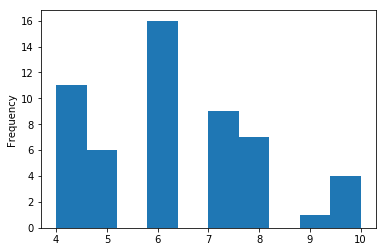

In [8]:
# hist - гистограмма
df['econ'].plot('hist')

Если мы все же предположим, что распределение нормальное (просто выборка маленькая и по ней незаметно), мы сможем использовать критерий Стьюдента для одной выборки (*1-sample t-test*):

In [9]:
stats.ttest_1samp(df['econ'], 6) 

Ttest_1sampResult(statistic=1.1091540214492386, pvalue=0.272371318024516)

Уровень значимости мы приняли равным 5%, значит, $\alpha = 0.05$. 

p-value > $\alpha$, следовательно, на имеющихся данных на 5% уровне значимости нет оснований отвергнуть нулевую гипотезу в пользу альтернативы (это статистический вывод). Средняя оценка студентов по экономике равна 6 (это содержательный вывод).

Если бы мы проверяли гипотезу о равенстве средней оценке по экномике 5, ситуация была бы обратной, и нулевую гипотезу следовало бы отвергнуть:

In [10]:
stats.ttest_1samp(df['econ'], 5) 

Ttest_1sampResult(statistic=5.38731953275344, pvalue=1.674626984992714e-06)

Значит, разница всего в один балл является существенной для наших данных (несложно угадать, почему, если вспомнить, что 5 баллов – это «удовлетворительно», а 6 баллов – уже «хорошо»).

**Гипотеза о равенстве средних**

Сравним средние оценки юношей и девушек, сгруппировав строки по показателю `male`:

In [11]:
groups = df.groupby('male')
groups.mean()

,catps,mstat,soc,econ,eng,polth,mstat2,phist,law,phil,polsoc,ptheo,preg,compp,game,wpol
male,,,,,,,,,,,,,,,,
0,6.419355,7.354839,7.161290,6.000000,8.387097,6.258065,7.064516,5.451613,6.838710,5.741935,7.064516,5.419355,7.193548,5.548387,6.322581,7.612903
1,7.347826,7.913043,7.347826,6.608696,8.391304,7.347826,7.260870,6.347826,7.130435,6.521739,7.782609,6.043478,6.304348,5.782609,6.434783,7.869565


Сохраним оценки по теории игр (`game`), сгруппированные по полу, в переменные `male_game` и `female_game`.

In [12]:
male_game = df[df['male'] == 1]['game']
female_game = df[df['male'] == 0]['game']

Проверим на 10%-ном уровне значимости гипотезу о равенстве средних оценок по теории игр у юношей и девушек (опять же в предположении о том, что обе выборки взяты из нормального распределения):

$H_0: \mu_{male} = \mu_{female}$

$H_1: \mu_{male} \ne \mu_{female}$ (альтернативы в Python всегда двусторонние)

In [13]:
# ind - потому что две выборки независимы
stats.ttest_ind(female_game, male_game)

Ttest_indResult(statistic=-0.22389694844949543, pvalue=0.8237148426143586)

На имеющихся данных, на уровне значимости 10% (и на меньшем) нет оснований отвергнуть нулевую гипотезу. Средние оценки по теории игр у юношей и девушек можно считать равными.

Проделам то же с оценками по политической истории (`phist`):

In [14]:
male_phist = df[df['male'] == 1]['phist']
female_phist = df[df['male'] == 0]['phist']

In [15]:
stats.ttest_ind(female_phist, male_phist)

Ttest_indResult(statistic=-2.0846778601989686, pvalue=0.04202658789268412)

Тут ситуация уже менее однозначная – все зависит от уровня значимости (подумайте, при каких уровнях значимости нулевая гипотеза будет отвергаться, а при каких – нет).

Точно так же можем сравнить оценки по разным курсам (в разных столбцах, например, по разным частям «Математики и статистики»).

In [16]:
stats.ttest_ind(df.mstat, df.mstat2)

Ttest_indResult(statistic=1.4474034225404007, pvalue=0.15073504510027344)

**Гипотеза о равенстве нулю коэффициента корреляции**

Немного визуализации

In [17]:
from pandas.tools import plotting

Матрица диаграмм рассеяния для выбранных столбцов (как *scattermatrix* в R):

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2140ceb8>,
      dtype=object)

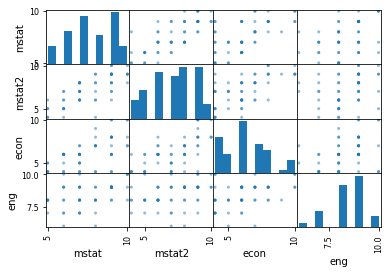

In [18]:
% matplotlib inline

plotting.scatter_matrix(df[['mstat', 'mstat2', 'econ', 'eng']]) 

Коэффициенты корреляции

Оценим связь между оценками за курс «Математика и статистика 1» и «Математика и статистика 2».

$H_0: \rho = 0$ (связи нет, коэффициент корреляции не является статистически значимым)

$H_1: \rho \ne 0$ (связь есть, коэффцициент корреляции является статистически значимым)

In [19]:
stats.pearsonr(df.mstat, df.mstat2) # коэффициент Пирсона

(0.7557387472251619, 3.961005655367343e-11)

Интерпретация: связь прямая (положительная) и сильная, нулевая гипотеза о незначимости коэффициеинта корреляции отвергается (на любом конвенциональном уровне значимости), есть значимая связь между оценками по двум частям курса «Математика и статистика».

In [20]:
stats.spearmanr(df.mstat, df.mstat2) # коэффициент Спирмена (более уместен здесь - шкала порядковая)

SpearmanrResult(correlation=0.7631510956897434, pvalue=1.965305087090471e-11)